In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('creditcard.csv')


In [4]:
df_shape = df.shape
missing_values = df.isnull().any().sum()



In [5]:
fraud_percentage = len(df[df['Class'] == 1]) / len(df) * 100

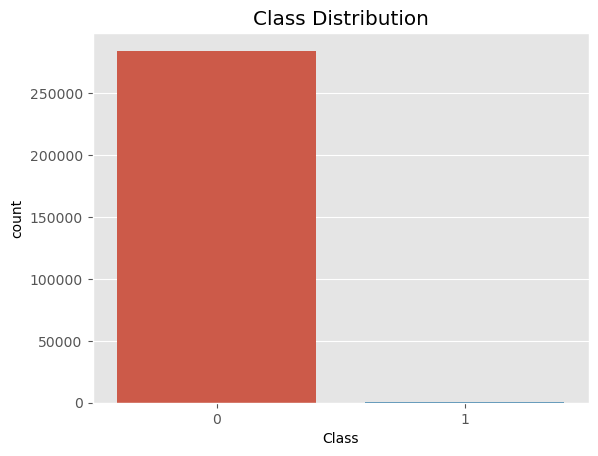

In [6]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


In [7]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')
print(len(fraud))

frauds : 0.1727485630620034 %
non frauds : 99.82725143693798 %
492


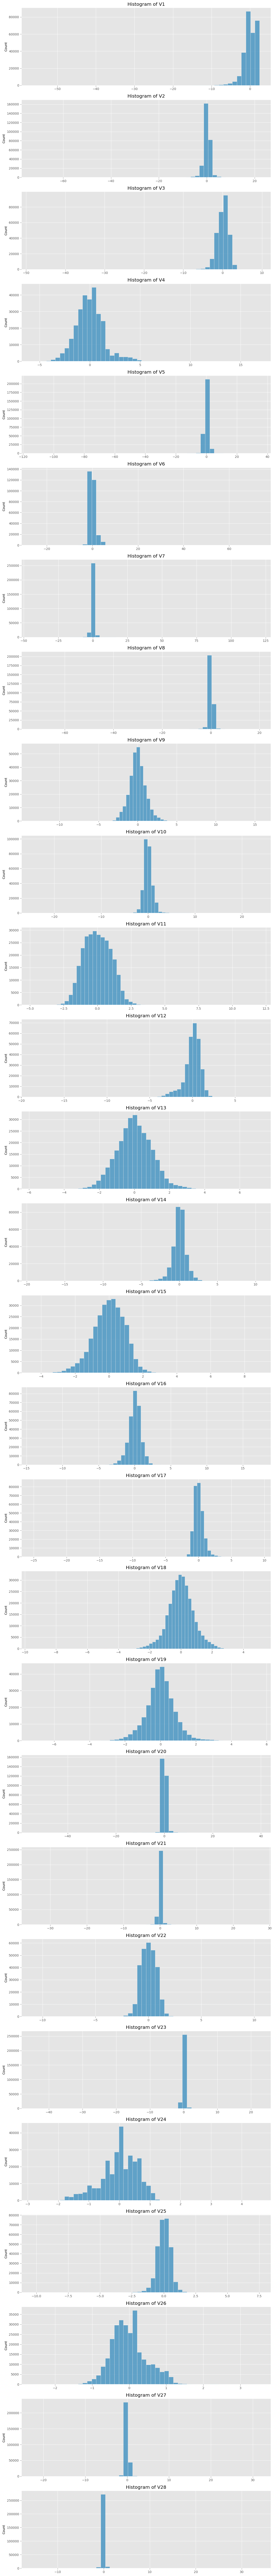

In [8]:
anomalous_features = df.iloc[:, 1:29].columns
plt.figure(figsize=(12, 28 * 4))
for i, cn in enumerate(df[anomalous_features]):
    plt.subplot(28, 1, i + 1)
    sns.histplot(df[cn][df.Class == 1], bins=50)
    sns.histplot(df[cn][df.Class == 0], bins=50)
    plt.xlabel('')
    plt.title('Histogram of ' + str(cn))
plt.tight_layout()
plt.show()


In [9]:
X = df.drop(['Class'], axis=1)
y = df['Class']
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.values)
final_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([final_df, y], axis=1)


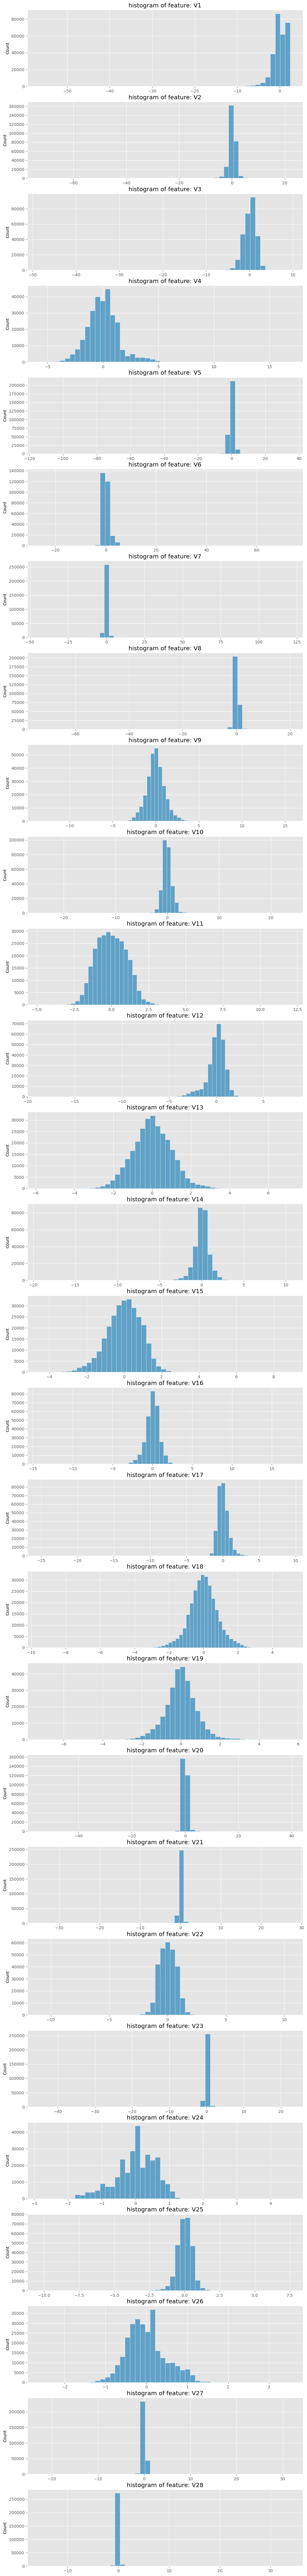

In [10]:
import matplotlib.gridspec as gridspec
anomalous_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.histplot(df[cn][df.Class == 1], bins=50)
    sns.histplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [11]:
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [12]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,1.571777,-0.675139,0
1,-1.086217,-0.282962,0
2,2.053492,1.077873,0
3,1.150071,-0.427575,0
4,1.143810,-1.341902,0


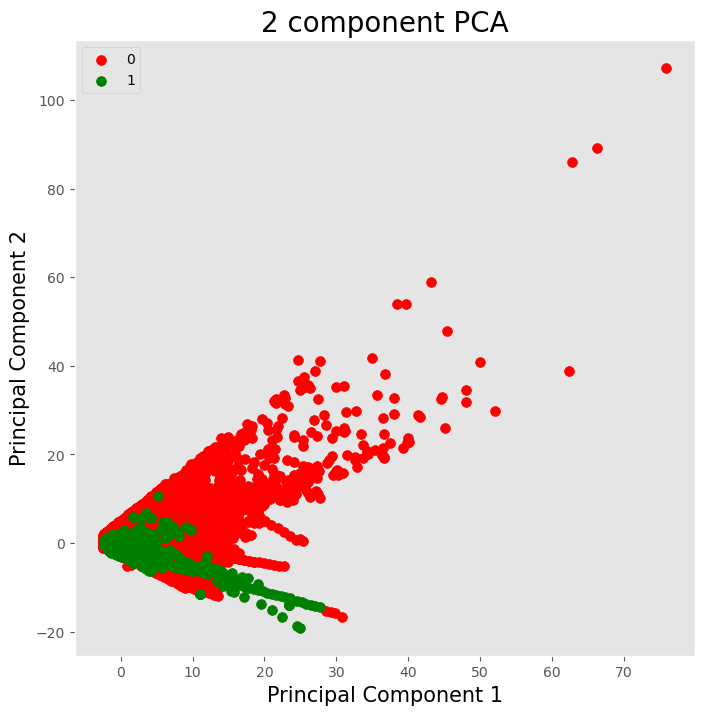

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Text(0, 0.5, 'Frequency')

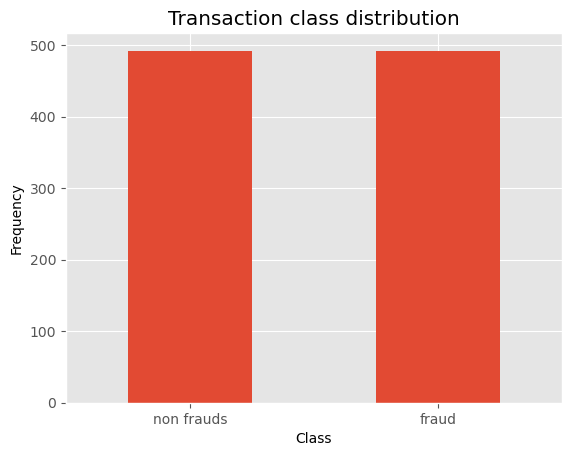

In [14]:
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
new_df = new_df.sample(frac=1, random_state=42)

labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

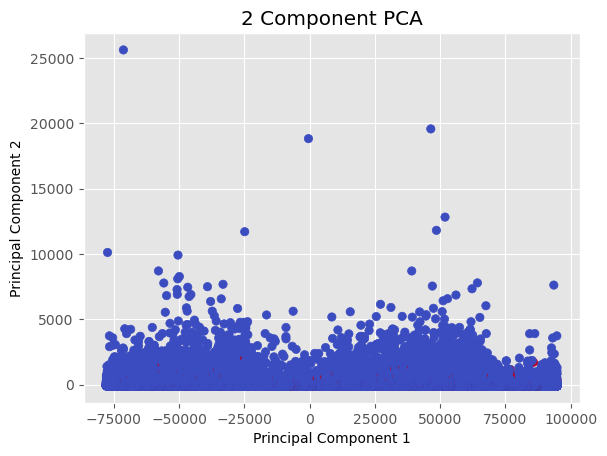

In [17]:
plt.scatter(final_df['PC1'], final_df['PC2'], c=final_df['Class'], cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.show()


In [18]:
frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]
new_df = pd.concat([non_frauds, frauds]).sample(frac=1, random_state=42)


In [19]:
features = new_df.drop(['Class'], axis=1)
labels = pd.DataFrame(new_df['Class'])
feature_array = features.values
label_array = labels.values


In [20]:
X_train, X_test, y_train, y_test = train_test_split(feature_array, label_array, test_size=0.20)
X_train = normalize(X_train)
X_test = normalize(X_test)


In [21]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [22]:
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=7)

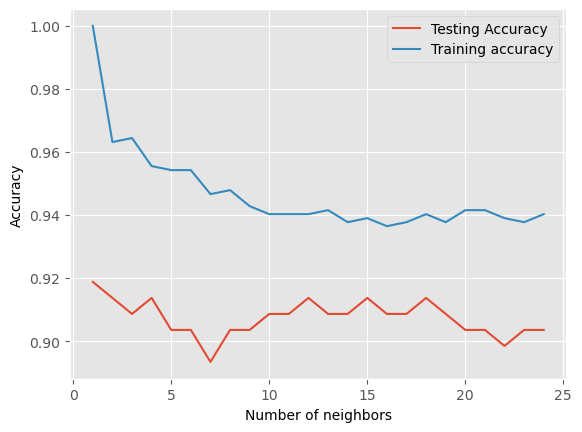

In [23]:
neighbours = np.arange(1, 25)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i, k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", n_jobs=-1)
    knn.fit(X_train, y_train.ravel())
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    test_accuracy[i] = knn.score(X_test, y_test.ravel())

plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [27]:
idx = np.where(test_accuracy == max(test_accuracy))
best_k = neighbours[idx][0]
knn = KNeighborsClassifier(n_neighbors=best_k, algorithm="kd_tree", n_jobs=-1)
knn.fit(X_train, y_train.ravel())
knn_predicted_test_labels = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predicted_test_labels)
knn_f1 = f1_score(y_test, knn_predicted_test_labels)


In [29]:
print("K-Nearest Neighbors Model:")
print("Accuracy:", knn_accuracy)
print("F1-Score:", knn_f1)


K-Nearest Neighbors Model:
Accuracy: 0.9187817258883249
F1-Score: 0.9223300970873787
